In [1]:
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = torch.linspace(-3, 5, 50).float()

def function(x):
  return (x - 4)**2


var = torch.autograd.Variable(torch.tensor(0.), requires_grad=True)
optimizer = torch.optim.Adam([var], lr=1e-1)

for _ in range(100):
  optimizer.zero_grad()
  loss = function(var)
  loss.backward()
  optimizer.step()

var

tensor(4.0214, requires_grad=True)

tensor([[3.9900, 5.9900],
        [6.0100, 6.9900],
        [7.0100, 8.9900]], requires_grad=True)
tensor([[1.7025, 3.6154],
        [7.2656, 3.3694],
        [4.7963, 8.2684]], requires_grad=True)
tensor([[1.7454, 2.4987],
        [7.2692, 3.1172],
        [4.2000, 7.9818]], requires_grad=True)
tensor([[1.7442, 2.4884],
        [7.2692, 3.1154],
        [4.2000, 7.9818]], requires_grad=True)
tensor([[1.7442, 2.4884],
        [7.2692, 3.1154],
        [4.2000, 7.9818]], requires_grad=True)
tensor([[1.7442, 2.4884],
        [7.2692, 3.1154],
        [4.2000, 7.9818]])


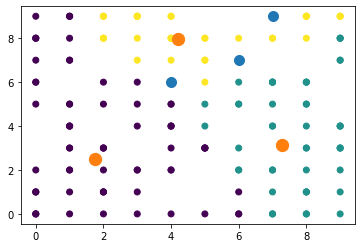

In [3]:
def tensor_inertia(dots, centers, start):
  n_dots = dots.shape[0]
  n_centers = centers.shape[0]
  n_dim = dots.shape[1]

  dots = dots.unsqueeze(1).repeat(1, n_centers, 1)
  centers = centers.unsqueeze(0).repeat(n_dots, 1, 1)
  start = start.unsqueeze(0).repeat(n_dots, n_centers, 1)

  dist = torch.sum((dots - centers)**2, dim=2)# + n_dots / torch.sum((centers - start)**2, dim=2)
  return dist.min(dim=1)[0].mean()


def nearest_center(dot, centers, start):
  cmp_dot = dot.repeat(centers.shape[0], 1)
  cmp_start = start.repeat(centers.shape[0], 1)
  centers_from_dot = torch.sum((centers - cmp_dot)**2, dim=1)
  centers_from_dot = centers_from_dot / centers_from_dot.max()
  centers_from_start = torch.sum((centers - cmp_start)**2, dim=1)
  centers_from_start = centers_from_start / centers_from_start.max()
  return torch.argmin(centers_from_dot + 0.5 * centers_from_start)


start_point = torch.tensor([[0., 0.]])
dots = torch.randint(low=0, high=10, size=(150, 2)).float()

# centers = torch.tensor([[5.1, 5.1],
#                         [4.9, 4.9],
#                         [5., 5.]]).float()

centers = torch.randint(low=0, high=10, size=(3,2,)).float()

start_centers = centers.clone()

centers = torch.autograd.Variable(centers, requires_grad=True)
optimizer = torch.optim.Adam([centers], lr=1e-2)

for i in range(2500):
  optimizer.zero_grad()
  loss = tensor_inertia(dots, centers, start_point)
  loss.backward()
  optimizer.step()
  if i % 500 == 0:
    print(centers)


test_centers = centers.detach()
print(test_centers)
labels = [nearest_center(dot.unsqueeze(0), test_centers, start_point).item() for dot in dots]

plt_centers = test_centers.numpy()

plt.scatter(dots[:, 0], dots[:, 1], c=labels)
plt.scatter(start_centers[:, 0], start_centers[:, 1], s=100)
plt.scatter(plt_centers[:, 0], plt_centers[:, 1], s=150)
plt.show()